In [ ]:
# ! kaggle datasets download -d nikdavis/steam-store-games --force --unzip

In [ ]:
# ! pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Self_Anaconda/Steam/steam.csv')
data = data.drop('appid', axis=1)
data = data.drop('positive_ratings', axis=1)
data = data.drop('negative_ratings', axis=1)
data = data.drop('average_playtime', axis=1)
data = data.drop('median_playtime', axis=1)

In [ ]:
data['required_age'].fillna(0, inplace=True)
data['price'].fillna(data['price'].mean(), inplace=True)
data['owners_mid'] = data['owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Select columns to encode
cat_columns = ['developer', 'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags']

# MultiLabelBinarizer for multiple value columns
multi_label_binarizer = MultiLabelBinarizer()
multi_val_columns = ['platforms', 'categories', 'genres', 'steamspy_tags']

for col in multi_val_columns:
    data[col] = data[col].apply(lambda x: x.split(';'))
    one_hot_encoded = multi_label_binarizer.fit_transform(data[col])
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=[f"{col}_{category}" for category in multi_label_binarizer.classes_])
    data = pd.concat([data, one_hot_encoded_df], axis=1)

# LabelEncoder for single value columns
label_encoder = LabelEncoder()
single_val_columns = ['developer', 'publisher']

for col in single_val_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Drop original columns after encoding
data.drop(cat_columns, axis=1, inplace=True)


In [ ]:
# num_columns = ['required_age', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']
num_columns = ['required_age', 'achievements', 'price']

scaler = MinMaxScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])

X = data.drop(['name', 'release_date', 'owners', 'owners_mid'], axis=1)

data['owners_log'] = np.log1p(data['owners_mid'])
y = data['owners_log']
# y = data['owners_mid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 3.7597536635940545e+21


In [ ]:
X_train

,english,required_age,achievements,price,platforms_linux,platforms_mac,platforms_windows,categories_Captions available,categories_Co-op,categories_Commentary available,...,steamspy_tags_Warhammer 40K,steamspy_tags_Web Publishing,steamspy_tags_Werewolves,steamspy_tags_Western,steamspy_tags_Word Game,steamspy_tags_World War I,steamspy_tags_World War II,steamspy_tags_Wrestling,steamspy_tags_Zombies,steamspy_tags_e-sports
1807,1,0.0,0.005091,0.040262,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25093,1,0.0,0.000000,0.042631,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8355,1,0.0,0.001935,0.016564,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6151,1,0.0,0.003666,0.026043,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21814,1,0.0,0.000509,0.023674,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1,0.0,0.000916,0.001872,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,1,0.0,0.011302,0.000000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,1,0.0,0.000000,0.009455,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
15795,1,0.0,0.003666,0.009455,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_pred = xgb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.9023389675969149


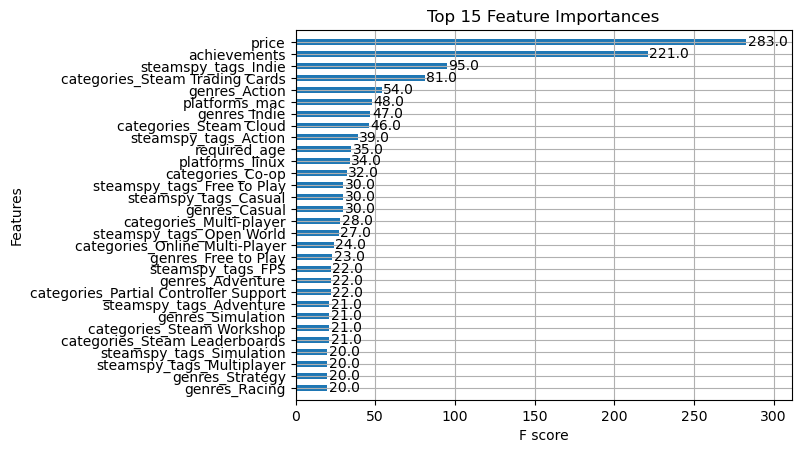

In [ ]:
# ! pip install xgboost matplotlib
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot the top 15 feature importances
xgb.plot_importance(xgb_regressor, max_num_features=30, height=0.5)
plt.title("Top 15 Feature Importances")
plt.show()


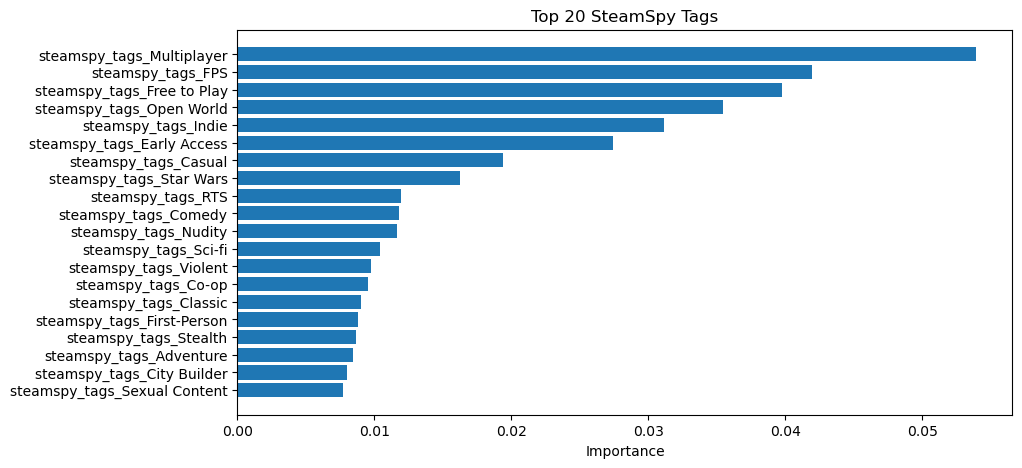

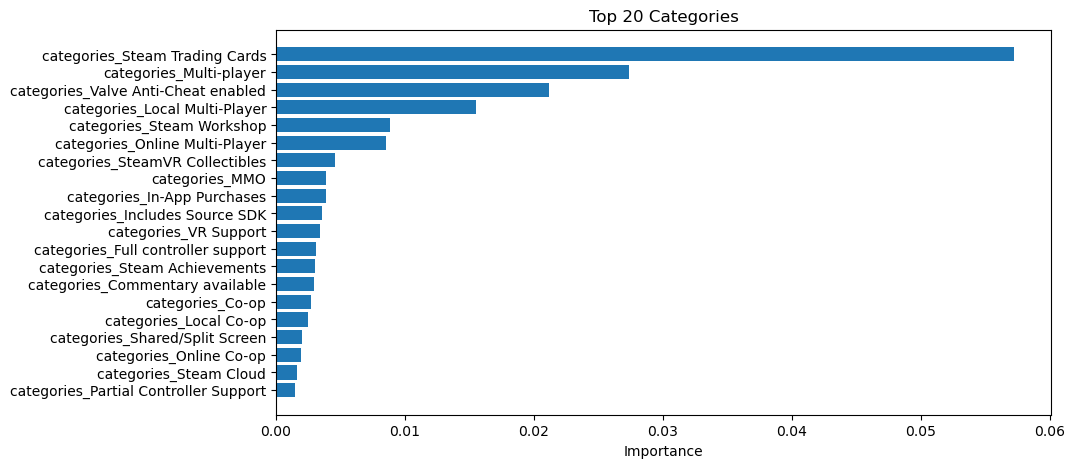

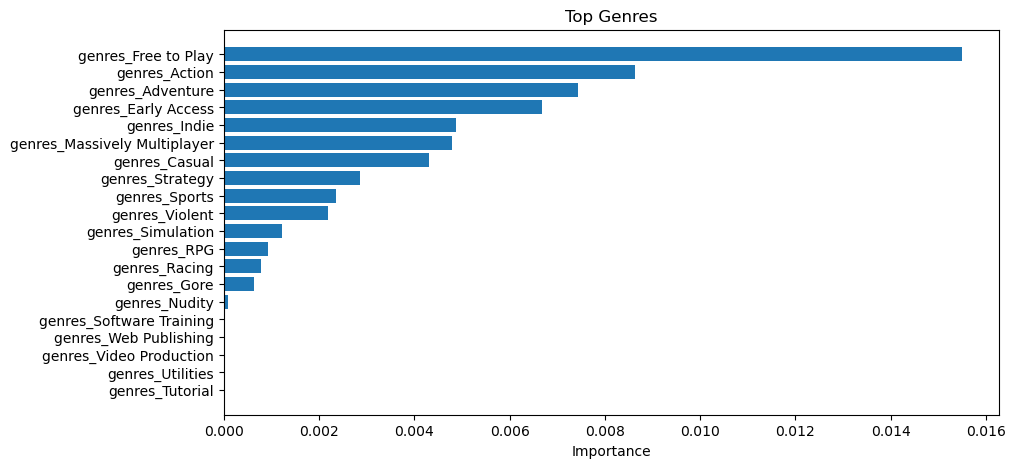

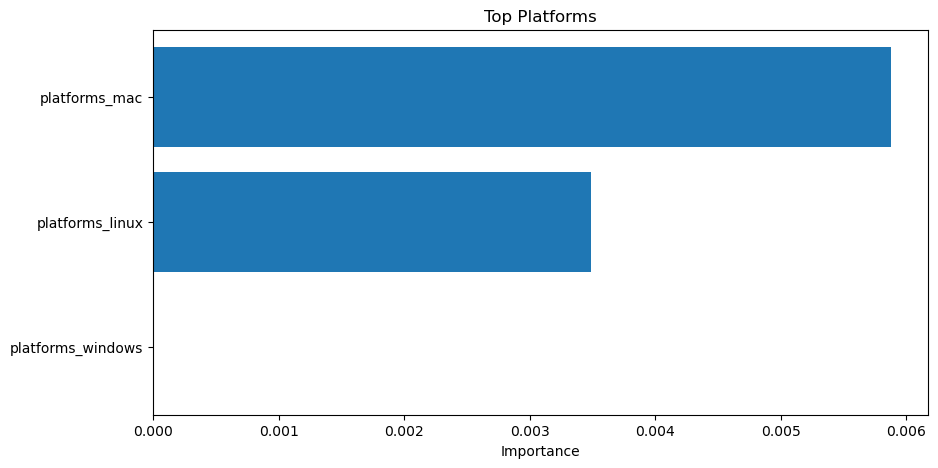

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances and sort them in descending order
feature_importances = xgb_regressor.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Get feature names
feature_names = X_train.columns

def plot_top_features(title, feature_prefix, max_num_features=20):
    # Filter features by the specified prefix
    filtered_features = [feature for feature in feature_names if feature.startswith(feature_prefix)]

    # Get the indices of the filtered features in the sorted array
    filtered_indices = [idx for idx in sorted_idx if feature_names[idx] in filtered_features]

    # Get the top features and their importances
    top_features = feature_names[filtered_indices[:max_num_features]]
    top_importances = feature_importances[filtered_indices[:max_num_features]]

    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    plt.barh(top_features, top_importances)
    plt.xlabel('Importance')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot top features for each group
plot_top_features("Top 20 SteamSpy Tags", "steamspy_tags_")
plot_top_features("Top 20 Categories", "categories_")
plot_top_features("Top Genres", "genres_")
plot_top_features("Top Platforms", "platforms_")


In [ ]:
# https://store.steampowered.com/hwsurvey/Steam-Hardware-Software-Survey-Welcome-to-Steam?platform=combined
# Steam Hardware survey

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = random_forest_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.9079615592599727


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5) 
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
y_pred = knn_regressor.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.1203514806381936


In [ ]:
# pip install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [ ]:
data.head()

,name,release_date,english,required_age,achievements,owners,price,owners_mid,platforms_linux,platforms_mac,...,steamspy_tags_Web Publishing,steamspy_tags_Werewolves,steamspy_tags_Western,steamspy_tags_Word Game,steamspy_tags_World War I,steamspy_tags_World War II,steamspy_tags_Wrestling,steamspy_tags_Zombies,steamspy_tags_e-sports,owners_log
0,Counter-Strike,2000-11-01,1,0.0,0.0,10000000-20000000,0.017038,15000000.0,1,1,...,0,0,0,0,0,0,0,0,0,16.523561
1,Team Fortress Classic,1999-04-01,1,0.0,0.0,5000000-10000000,0.009455,7500000.0,1,1,...,0,0,0,0,0,0,0,0,0,15.830414
2,Day of Defeat,2003-05-01,1,0.0,0.0,5000000-10000000,0.009455,7500000.0,1,1,...,0,0,0,0,0,1,0,0,0,15.830414
3,Deathmatch Classic,2001-06-01,1,0.0,0.0,5000000-10000000,0.009455,7500000.0,1,1,...,0,0,0,0,0,0,0,0,0,15.830414
4,Half-Life: Opposing Force,1999-11-01,1,0.0,0.0,5000000-10000000,0.009455,7500000.0,1,1,...,0,0,0,0,0,0,0,0,0,15.830414


In [ ]:
X.head()

,english,required_age,achievements,price,platforms_linux,platforms_mac,platforms_windows,categories_Captions available,categories_Co-op,categories_Commentary available,...,steamspy_tags_Warhammer 40K,steamspy_tags_Web Publishing,steamspy_tags_Werewolves,steamspy_tags_Western,steamspy_tags_Word Game,steamspy_tags_World War I,steamspy_tags_World War II,steamspy_tags_Wrestling,steamspy_tags_Zombies,steamspy_tags_e-sports
0,1,0.0,0.0,0.017038,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.009455,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.009455,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0.0,0.0,0.009455,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.009455,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# data = data.drop('name', axis=1)
# data = data.drop('release_date', axis=1)
data = pd.read_csv('Self_Anaconda/Steam/steam.csv')
data = data.drop('appid', axis=1)
data = data.drop('positive_ratings', axis=1)
data = data.drop('negative_ratings', axis=1)
data = data.drop('average_playtime', axis=1)
data = data.drop('median_playtime', axis=1)
data['required_age'].fillna(0, inplace=True)
data['price'].fillna(data['price'].mean(), inplace=True)
data['owners_mid'] = data['owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Select columns to encode
cat_columns = ['developer', 'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags']

# MultiLabelBinarizer for multiple value columns
multi_label_binarizer = MultiLabelBinarizer()
multi_val_columns = ['platforms', 'categories', 'genres', 'steamspy_tags']

for col in multi_val_columns:
    data[col] = data[col].apply(lambda x: x.split(';'))
    one_hot_encoded = multi_label_binarizer.fit_transform(data[col])
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=[f"{col}_{category}" for category in multi_label_binarizer.classes_])
    data = pd.concat([data, one_hot_encoded_df], axis=1)

# LabelEncoder for single value columns
label_encoder = LabelEncoder()
single_val_columns = ['developer', 'publisher']

for col in single_val_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Drop original columns after encoding
data.drop(cat_columns, axis=1, inplace=True)

# num_columns = ['required_age', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']
num_columns = ['required_age', 'achievements', 'price']

scaler = MinMaxScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])

X = data.drop(['name', 'release_date', 'owners', 'owners_mid'], axis=1)

data['owners_log'] = np.log1p(data['owners_mid'])
y = data['owners_log']
# y = data['owners_mid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


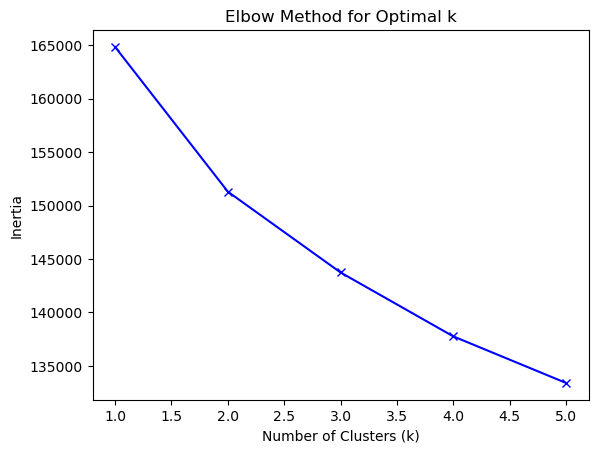

In [ ]:
inertia = []
K = range(1,6) # Try clustering with 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


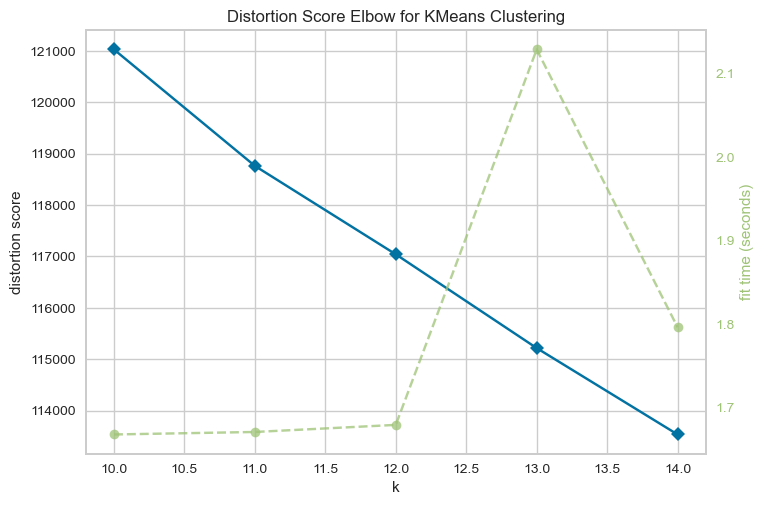

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(10,15), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

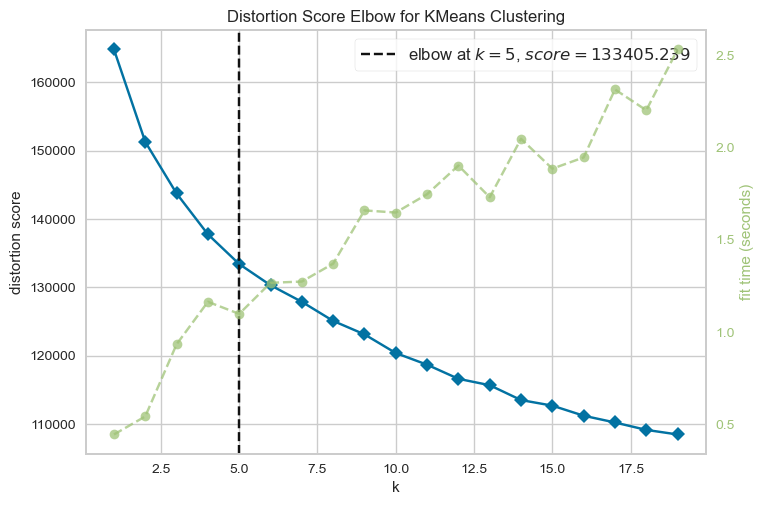

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,20), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
optimal_k = 5  # Replace with the optimal k value you found in the previous step
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=42)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [ ]:
X['cluster'] = labels


In [ ]:
print(X.head())

   english  required_age  achievements     price  platforms_linux  \
0        1           0.0           0.0  0.017038                1   
1        1           0.0           0.0  0.009455                1   
2        1           0.0           0.0  0.009455                1   
3        1           0.0           0.0  0.009455                1   
4        1           0.0           0.0  0.009455                1   

   platforms_mac  platforms_windows  categories_Captions available  \
0              1                  1                              0   
1              1                  1                              0   
2              1                  1                              0   
3              1                  1                              0   
4              1                  1                              0   

   categories_Co-op  categories_Commentary available  ...  \
0                 0                                0  ...   
1                 0                       

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.drop('cluster', axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])


In [ ]:
principal_df['cluster'] = X['cluster']


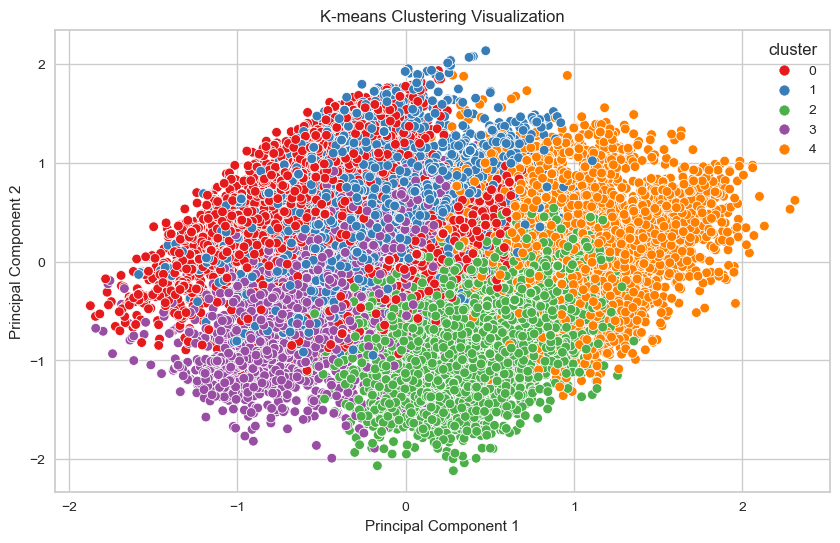

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='cluster', data=principal_df, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Visualization')
plt.show()


In [ ]:
X.head()

,english,required_age,achievements,price,platforms_linux,platforms_mac,platforms_windows,categories_Captions available,categories_Co-op,categories_Commentary available,...,steamspy_tags_Web Publishing,steamspy_tags_Werewolves,steamspy_tags_Western,steamspy_tags_Word Game,steamspy_tags_World War I,steamspy_tags_World War II,steamspy_tags_Wrestling,steamspy_tags_Zombies,steamspy_tags_e-sports,cluster
0,1,0.0,0.0,0.017038,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1,0.0,0.0,0.009455,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,0.0,0.0,0.009455,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,3
3,1,0.0,0.0,0.009455,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0.0,0.0,0.009455,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
y.head()

0    16.523561
1    15.830414
2    15.830414
3    15.830414
4    15.830414
Name: owners_log, dtype: float64

Feature ranking:


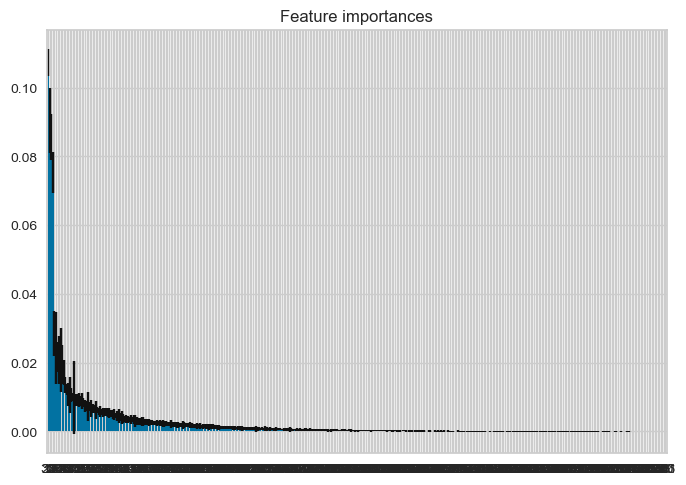

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load your dataset
# X = # features
# y = # target variable

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
# indices = np.argsort(importances)[::-1][:10]
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
    # print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


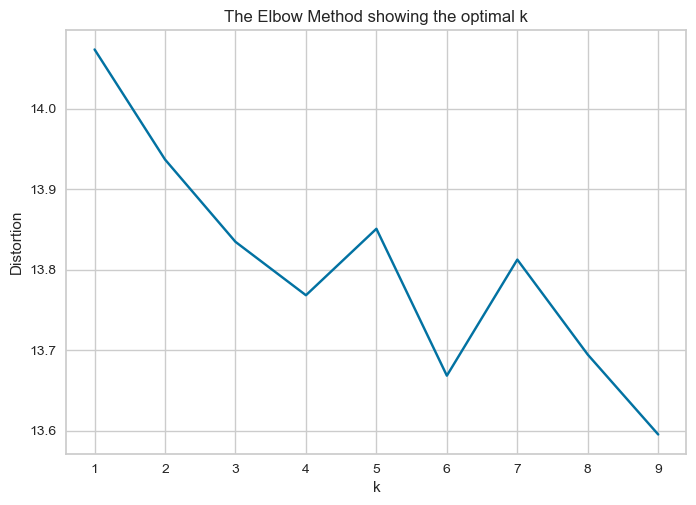

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 10)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(scaled_data)
    distortions.append(sum(np.min(cdist(scaled_data, k_means.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


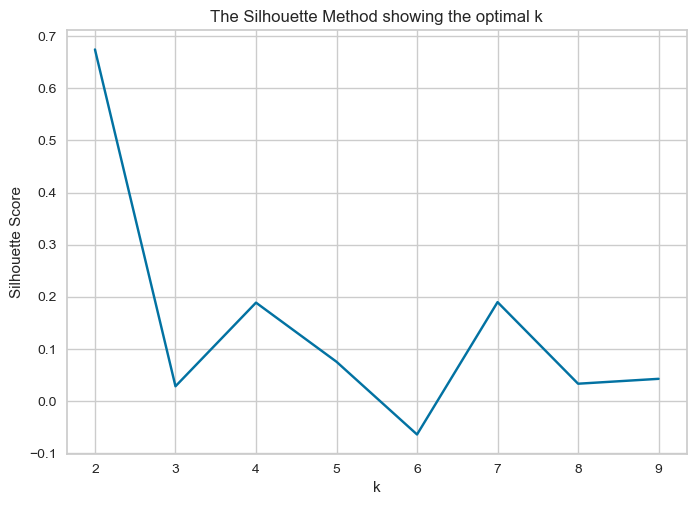

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 10)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, k_means.labels_))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()


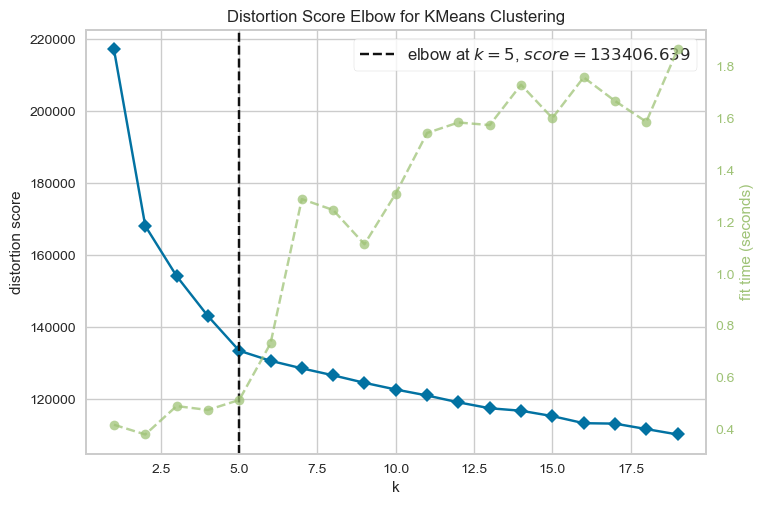

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,20), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
reduced_data = pca.fit_transform(scaled_data)


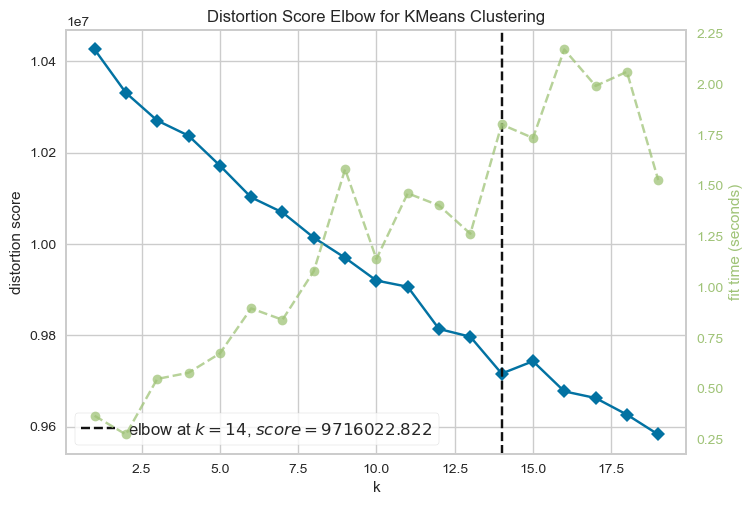

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,20), timings= True)
visualizer.fit(reduced_data)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
reduced_data = tsne.fit_transform(scaled_data)


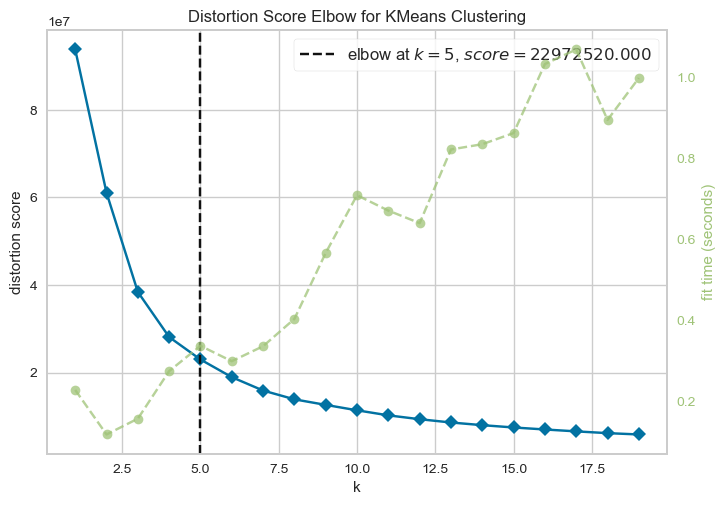

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,20), timings= True)
visualizer.fit(reduced_data)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

DBSCAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


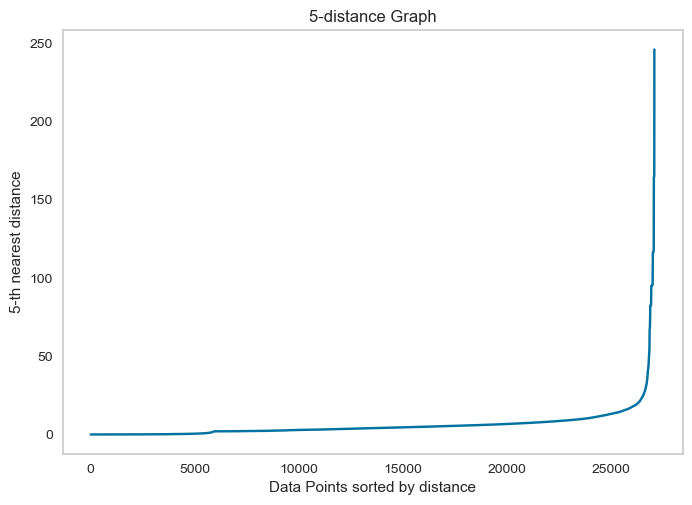

In [ ]:
from sklearn.neighbors import NearestNeighbors

k = 5  # Number of nearest neighbors to consider
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(scaled_data)
distances, _ = nearest_neighbors.kneighbors(scaled_data)

# Sort distances
distances = np.sort(distances[:, -1], axis=0)

plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th nearest distance')
plt.title(f'{k}-distance Graph')
plt.grid()
plt.show()


In [ ]:
eps_value = 0.15  # Set this based on the k-distance graph
min_samples_value = 5  # Set this based on domain knowledge or experiment with different values

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(scaled_data)


In [ ]:
# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


Estimated number of clusters: 269
Estimated number of noise points: 23375


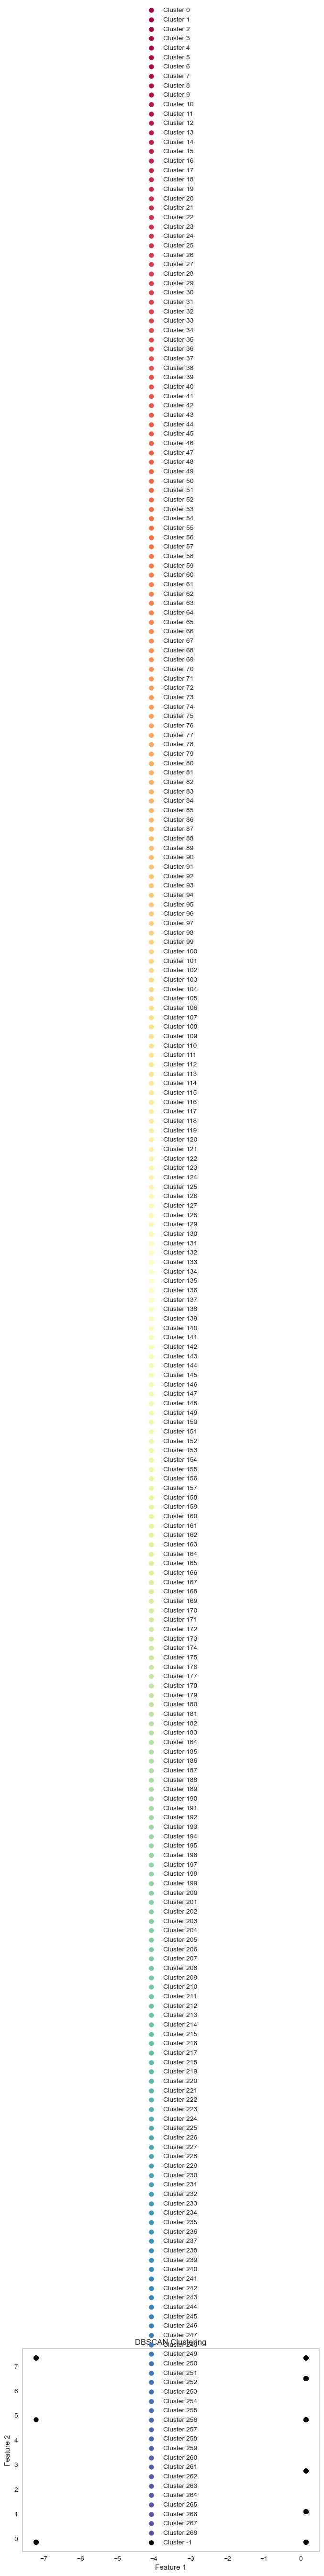

In [ ]:
# Plot the clusters
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)

    xy = scaled_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=50, label=f'Cluster {k}')

plt.legend()
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()


Removing unimportant features

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor


In [ ]:
estimator = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
n_features_to_select = 10  # Set this based on your requirements


In [ ]:
rfe = RFE(estimator, n_features_to_select=n_features_to_select)


In [ ]:
rfe.fit(X, y)


KeyboardInterrupt: ignored

In [ ]:
selected_features = np.array(X.columns)[rfe.support_]


In [ ]:
X_selected = X[selected_features]


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)


In [ ]:
y_pred = xgb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [ ]:
data = pd.read_csv('Self_Anaconda/Steam/steam.csv')
data = data.drop('appid', axis=1)
data['owners_mid'] = data['owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)
data['owners_log'] = np.log1p(data['owners_mid'])

In [ ]:
data['owners_mid']


0        15000000.0
1         7500000.0
2         7500000.0
3         7500000.0
4         7500000.0
            ...    
27070       10000.0
27071       10000.0
27072       10000.0
27073       10000.0
27074       10000.0
Name: owners_mid, Length: 27075, dtype: float64

In [ ]:
data['owners_log']

0        0.760539
1        0.688454
2        0.688454
3        0.688454
4        0.688454
           ...   
27070    0.000000
27071    0.000000
27072    0.000000
27073    0.000000
27074    0.000000
Name: owners_log, Length: 27075, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Data Preparation
# Normalize the data



scaler = MinMaxScaler()
data[['owners_log', 'positive_ratings', 'average_playtime']] = scaler.fit_transform(data[['owners_log', 'positive_ratings', 'average_playtime']])

# Create 'owners_mid' column
# data['owners_log'] = data['owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

# Calculate 25th and 75th percentiles
low_threshold, high_threshold = data['owners_log'].quantile([0.70, 0.87]).values

# Create success_level column
data['success_level'] = 'medium'
data.loc[data['owners_log'] < low_threshold, 'success_level'] = 'low'
data.loc[data['owners_log'] > high_threshold, 'success_level'] = 'high'


# Feature Selection
# Using Recursive Feature Elimination (RFE) with a Logistic Regression model
# model = LogisticRegression()
# rfe = RFE(model, n_features_to_select=2)
# rfe = rfe.fit(data[['positive_ratings', 'average_playtime']], data['success_level'])
# selected_features = ['positive_ratings', 'average_playtime'][rfe.support_]

# Initialize model and RFE
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
rfe = RFE(model, n_features_to_select=2)
rfe = rfe.fit(data[['positive_ratings', 'average_playtime']], data['success_level'])

# Get the selected features
selected_features = [column for column, support in zip(['positive_ratings', 'average_playtime'], rfe.support_) if support]

print(f"Selected Features: {selected_features}")

# Model Selection
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[selected_features], data['success_level'], test_size=0.3, random_state=42)

# Train and evaluate multiple models
models = {
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.2f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}, F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")


Selected Features: ['positive_ratings', 'average_playtime']
k-Nearest Neighbors - Accuracy: 0.82, Precision: 0.81, Recall: 0.82, F1-score: 0.81
Decision Tree - Accuracy: 0.81, Precision: 0.80, Recall: 0.81, F1-score: 0.80
Random Forest - Accuracy: 0.83, Precision: 0.82, Recall: 0.83, F1-score: 0.82


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Data Preparation
# Normalize the data



scaler = MinMaxScaler()
data[['owners_mid', 'positive_ratings', 'average_playtime']] = scaler.fit_transform(data[['owners_mid', 'positive_ratings', 'average_playtime']])

# Create 'owners_mid' column
data['owners_mid'] = data['owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

# Calculate 25th and 75th percentiles
low_threshold, high_threshold = data['owners_mid'].quantile([0.70, 0.87]).values

# Create success_level column
data['success_level'] = 'medium'
data.loc[data['owners_mid'] < low_threshold, 'success_level'] = 'low'
data.loc[data['owners_mid'] > high_threshold, 'success_level'] = 'high'


# Feature Selection
# Using Recursive Feature Elimination (RFE) with a Logistic Regression model
# model = LogisticRegression()
# rfe = RFE(model, n_features_to_select=2)
# rfe = rfe.fit(data[['positive_ratings', 'average_playtime']], data['success_level'])
# selected_features = ['positive_ratings', 'average_playtime'][rfe.support_]

# Initialize model and RFE
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
rfe = RFE(model, n_features_to_select=2)
rfe = rfe.fit(data[['positive_ratings', 'average_playtime']], data['success_level'])

# Get the selected features
selected_features = [column for column, support in zip(['positive_ratings', 'average_playtime'], rfe.support_) if support]

print(f"Selected Features: {selected_features}")

# Model Selection
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[selected_features], data['success_level'], test_size=0.3, random_state=42)

# Train and evaluate multiple models
models = {
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.2f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}, F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")


Selected Features: ['positive_ratings', 'average_playtime']
k-Nearest Neighbors - Accuracy: 0.82, Precision: 0.81, Recall: 0.82, F1-score: 0.81
Decision Tree - Accuracy: 0.81, Precision: 0.80, Recall: 0.81, F1-score: 0.80
Random Forest - Accuracy: 0.83, Precision: 0.82, Recall: 0.83, F1-score: 0.82


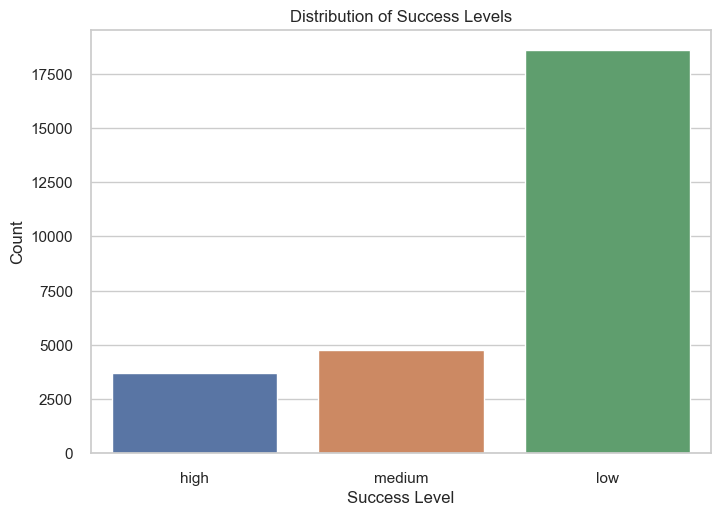

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot of the success level counts
ax = sns.countplot(x="success_level", data=data)

# Set plot title and labels
ax.set_title("Distribution of Success Levels")
ax.set_xlabel("Success Level")
ax.set_ylabel("Count")

# Display the plot
plt.show()

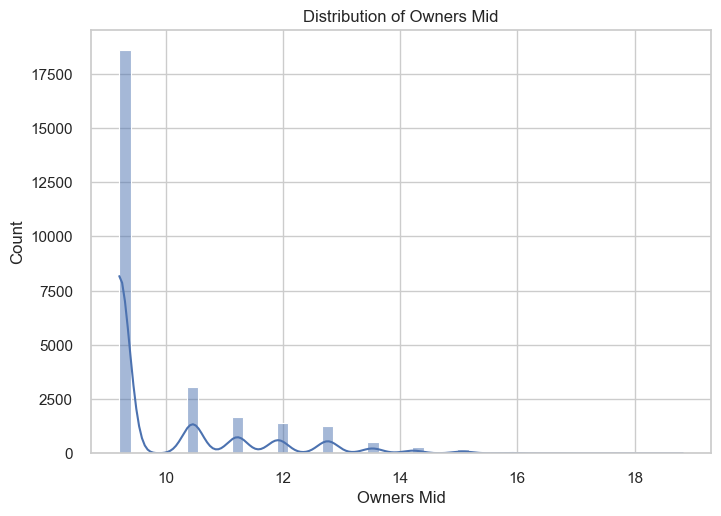

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create a histogram of the owners_mid distribution
ax = sns.histplot(data=data, x="owners_log", bins=50, kde=True)

# Set plot title and labels
ax.set_title("Distribution of Owners Mid")
ax.set_xlabel("Owners Mid")
ax.set_ylabel("Count")

# Display the plot
plt.show()

In [ ]:
data['owners_mid'].info

<bound method Series.info of 0        15000000.0
1         7500000.0
2         7500000.0
3         7500000.0
4         7500000.0
            ...    
27070       10000.0
27071       10000.0
27072       10000.0
27073       10000.0
27074       10000.0
Name: owners_mid, Length: 27075, dtype: float64>

In [ ]:
data['owners_log'].info

<bound method Series.info of 0        15000000.0
1         7500000.0
2         7500000.0
3         7500000.0
4         7500000.0
            ...    
27070       10000.0
27071       10000.0
27072       10000.0
27073       10000.0
27074       10000.0
Name: owners_log, Length: 27075, dtype: float64>

In [ ]:
data['owners_log'].describe()

count    27075.000000
mean         9.979455
std          1.344163
min          9.210440
25%          9.210440
50%          9.210440
75%         10.463132
max         18.826146
Name: owners_log, dtype: float64

In [ ]:
import numpy as np

# Calculate percentiles
percentiles = np.percentile(data['owners_log'], [25, 69, 80])

# Display percentiles
print(f"25th percentile: {percentiles[0]:.2f}")
print(f"50th percentile (median): {percentiles[1]:.2f}")
print(f"75th percentile: {percentiles[2]:.2f}")

25th percentile: 9.21
50th percentile (median): 10.46
75th percentile: 11.23


In [ ]:
unique_values = sorted(data['owners_mid'].unique())

# Print the unique values
print("Unique values for 'owners_mid':")
for value in unique_values:
    print(value)

Unique values for 'owners_log':
10000.0
35000.0
75000.0
150000.0
350000.0
750000.0
1500000.0
3500000.0
7500000.0
15000000.0
35000000.0
75000000.0
150000000.0


In [ ]:
import numpy as np

# Calculate percentiles
percentiles = np.percentile(data['owners_mid'], [25, 69, 87])

# Display percentiles
print(f"25th percentile: {percentiles[0]:.2f}")
print(f"50th percentile (median): {percentiles[1]:.2f}")
print(f"75th percentile: {percentiles[2]:.2f}")

25th percentile: 10000.00
50th percentile (median): 35000.00
75th percentile: 150000.00


In [ ]:
unique_values = sorted(data['owners_log'].unique())

# Print the unique values
print("Unique values for 'owners_log':")
for value in unique_values:
    print(value)

Unique values for 'owners_log':
9.210440366976517
10.463131911491967
11.225256725762893
11.918397239722838
12.765691290604371
13.527829818844937
14.220976332738882
15.068273812173887
15.830413711839864
16.52356082573315
17.370858648025116
18.132998684833918
18.826145858727198
